In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("./../../Dataset/data-week-2/house_price_regression_dataset.csv")

In [6]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [9]:
df.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [10]:
df["Num_Bedrooms"].value_counts()

Num_Bedrooms
2    215
5    205
1    201
4    197
3    182
Name: count, dtype: int64

In [11]:
df.columns

Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')

In [12]:
df["Garage_Size"].dtype

dtype('int64')

In [15]:
import matplotlib.pyplot as plt   # plt library for visualization
import seaborn as sns # visualization library

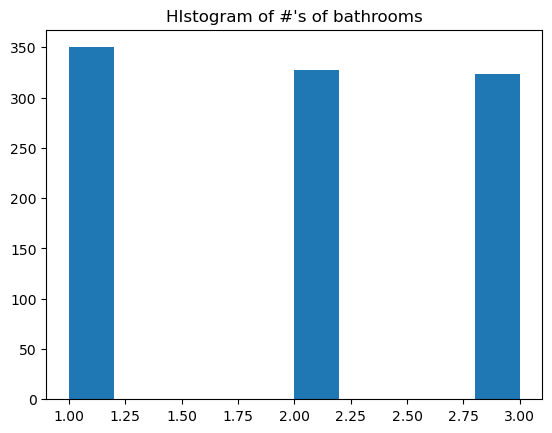

In [ ]:
# Histogram
# sns.countplot(df, x= "Lot_Size") 
plt.hist(df["Num_Bathrooms"])
plt.title("HIstogram of #'s of bathrooms")
plt.show()

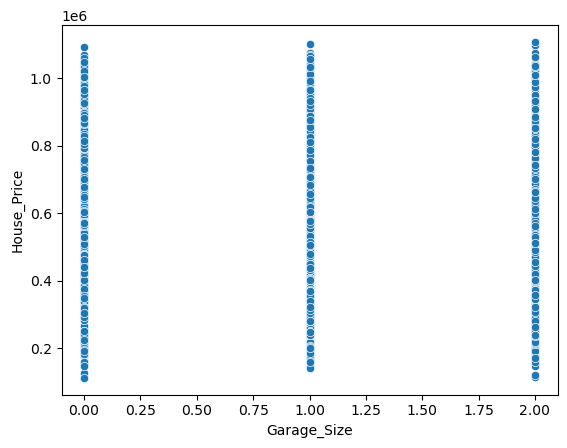

In [30]:
sns.scatterplot(df, x = "Garage_Size", y = "House_Price")
plt.show()

<Figure size 3000x2000 with 0 Axes>

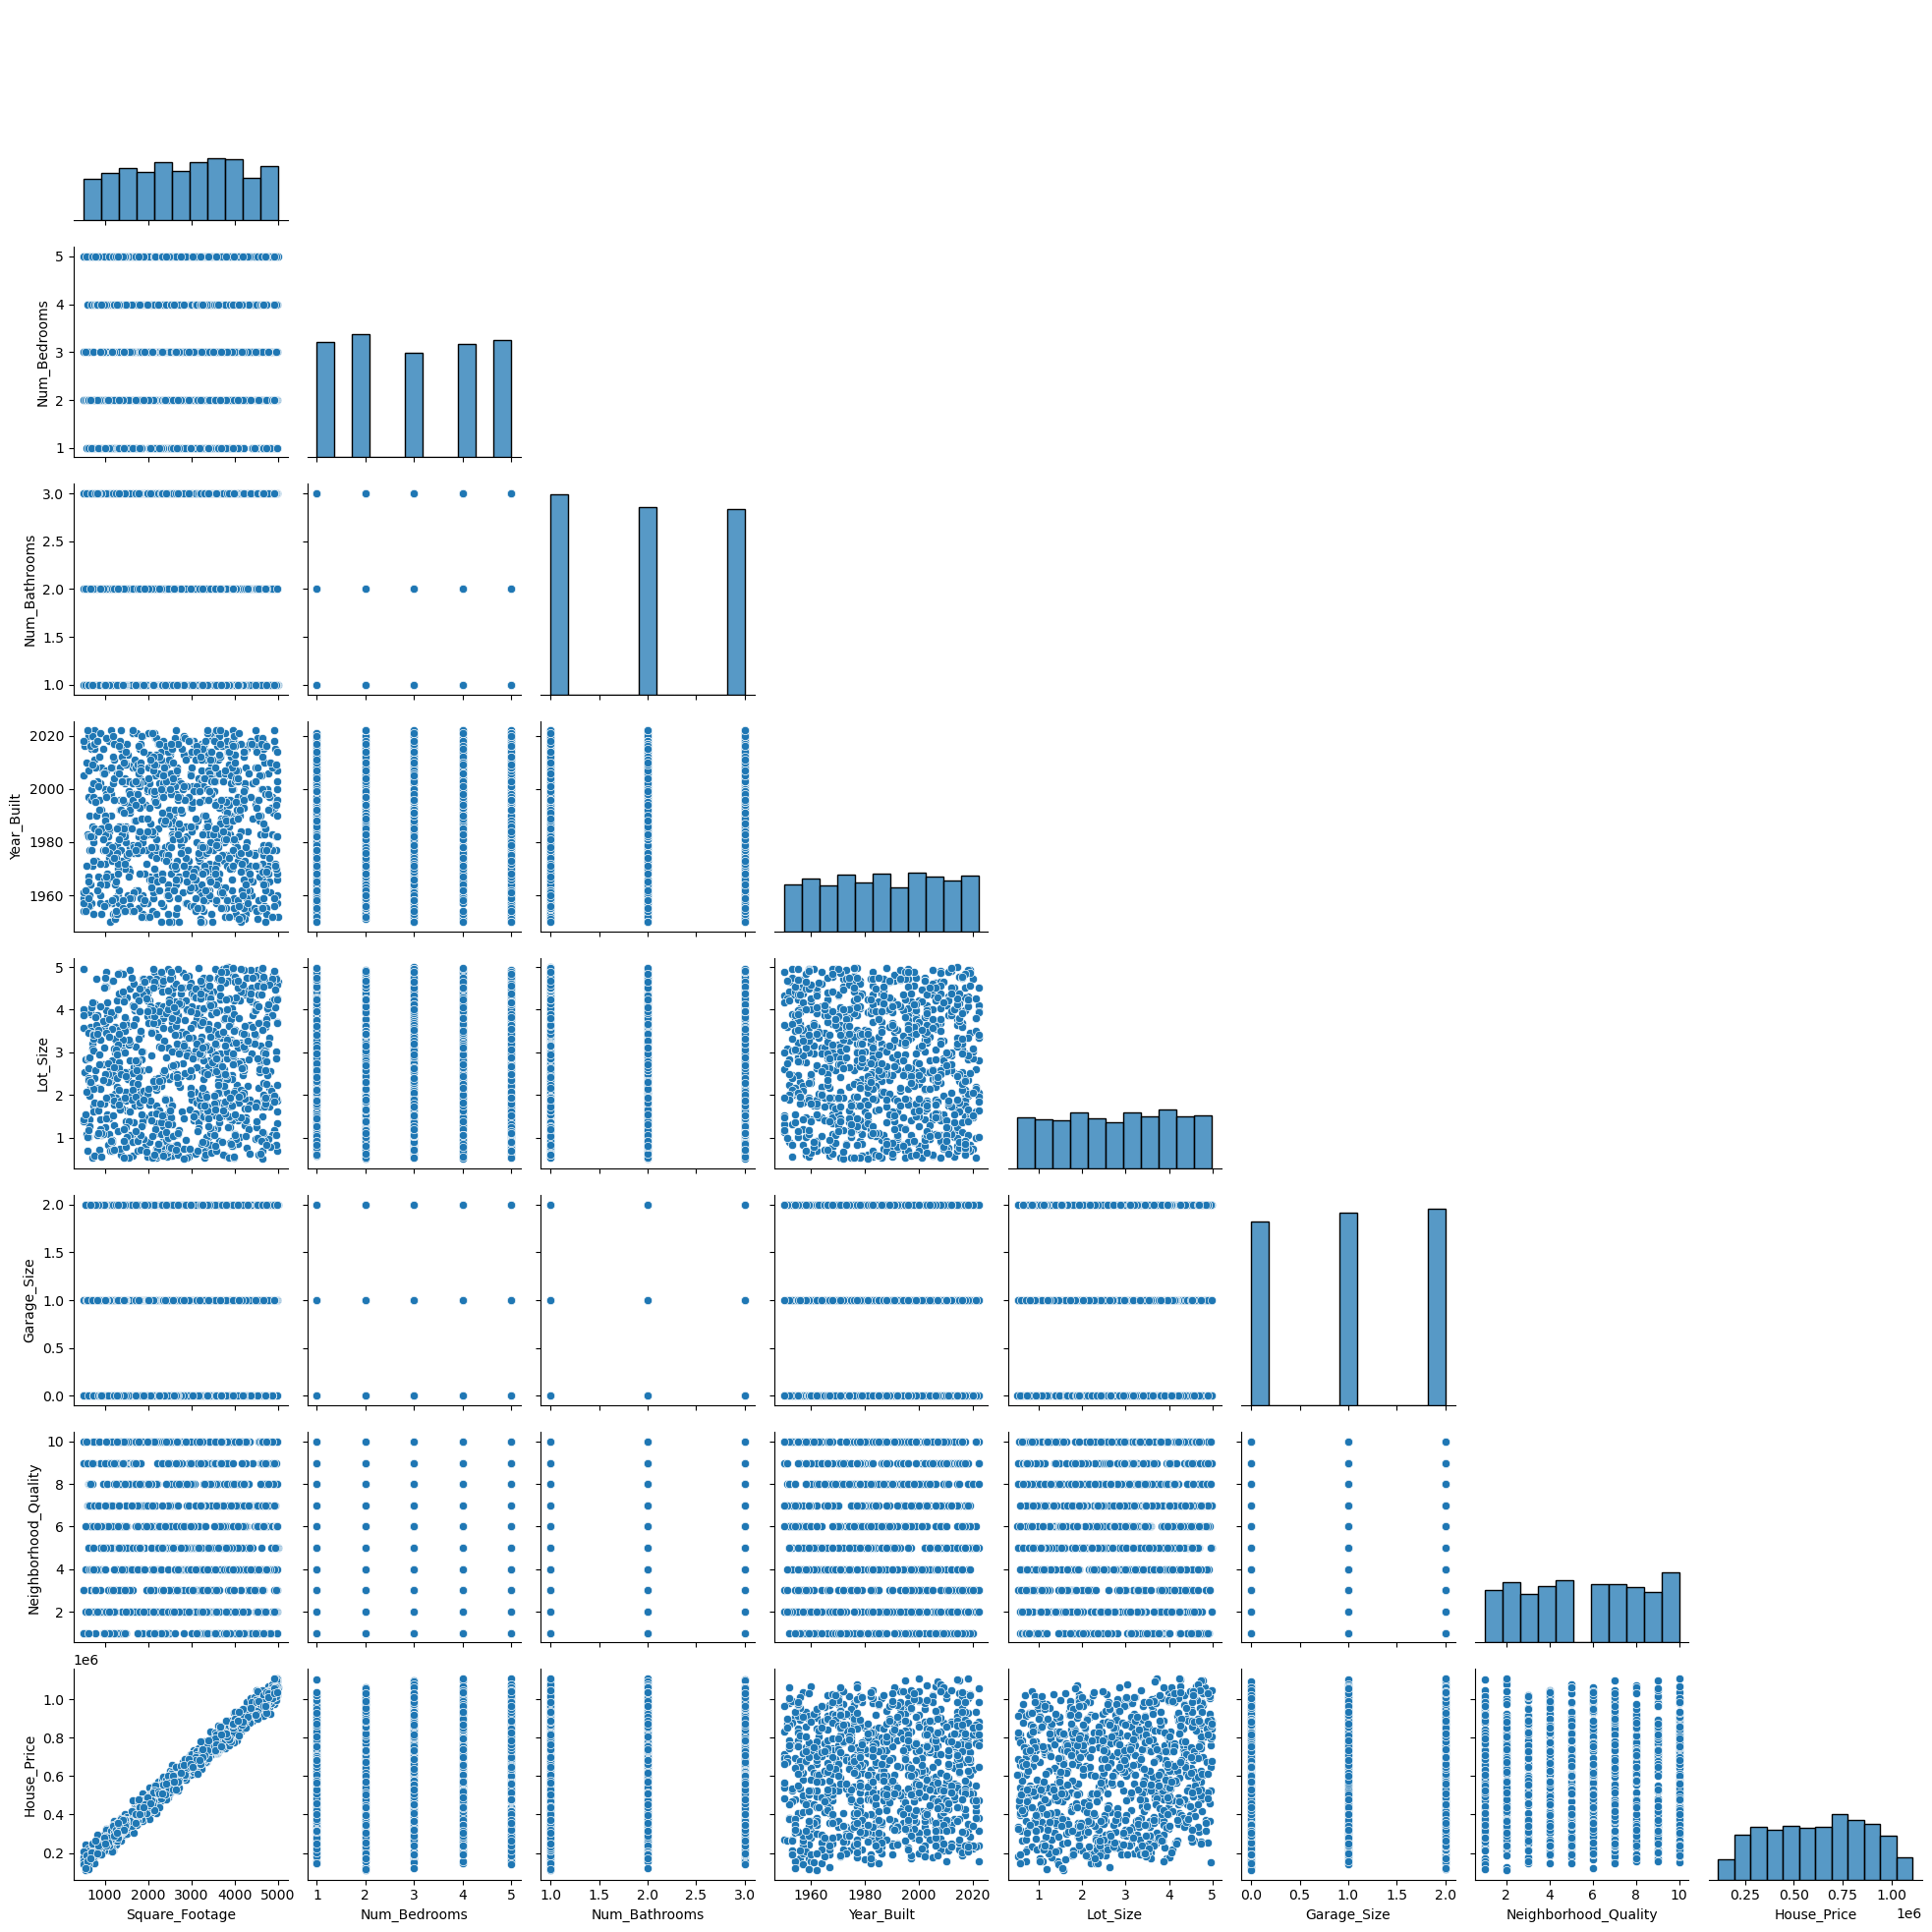

In [35]:
plt.figure(figsize = (30, 20))
sns.pairplot(df, corner = True)
plt.show()

In [37]:
df.corr()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
Square_Footage,1.000000,-0.043564,-0.031584,-0.022392,0.089479,0.030593,-0.008357,0.991261
Num_Bedrooms,-0.043564,1.000000,0.022848,-0.015820,-0.009355,0.113761,-0.049024,0.014633
Num_Bathrooms,-0.031584,0.022848,1.000000,-0.021063,0.034923,0.024846,0.017585,-0.001862
Year_Built,-0.022392,-0.015820,-0.021063,1.000000,-0.061050,-0.025485,-0.009549,0.051967
Lot_Size,0.089479,-0.009355,0.034923,-0.061050,1.000000,0.002436,0.037630,0.160412
Garage_Size,0.030593,0.113761,0.024846,-0.025485,0.002436,1.000000,-0.011287,0.052133
Neighborhood_Quality,-0.008357,-0.049024,0.017585,-0.009549,0.037630,-0.011287,1.000000,-0.007770
House_Price,0.991261,0.014633,-0.001862,0.051967,0.160412,0.052133,-0.007770,1.000000


<Axes: >

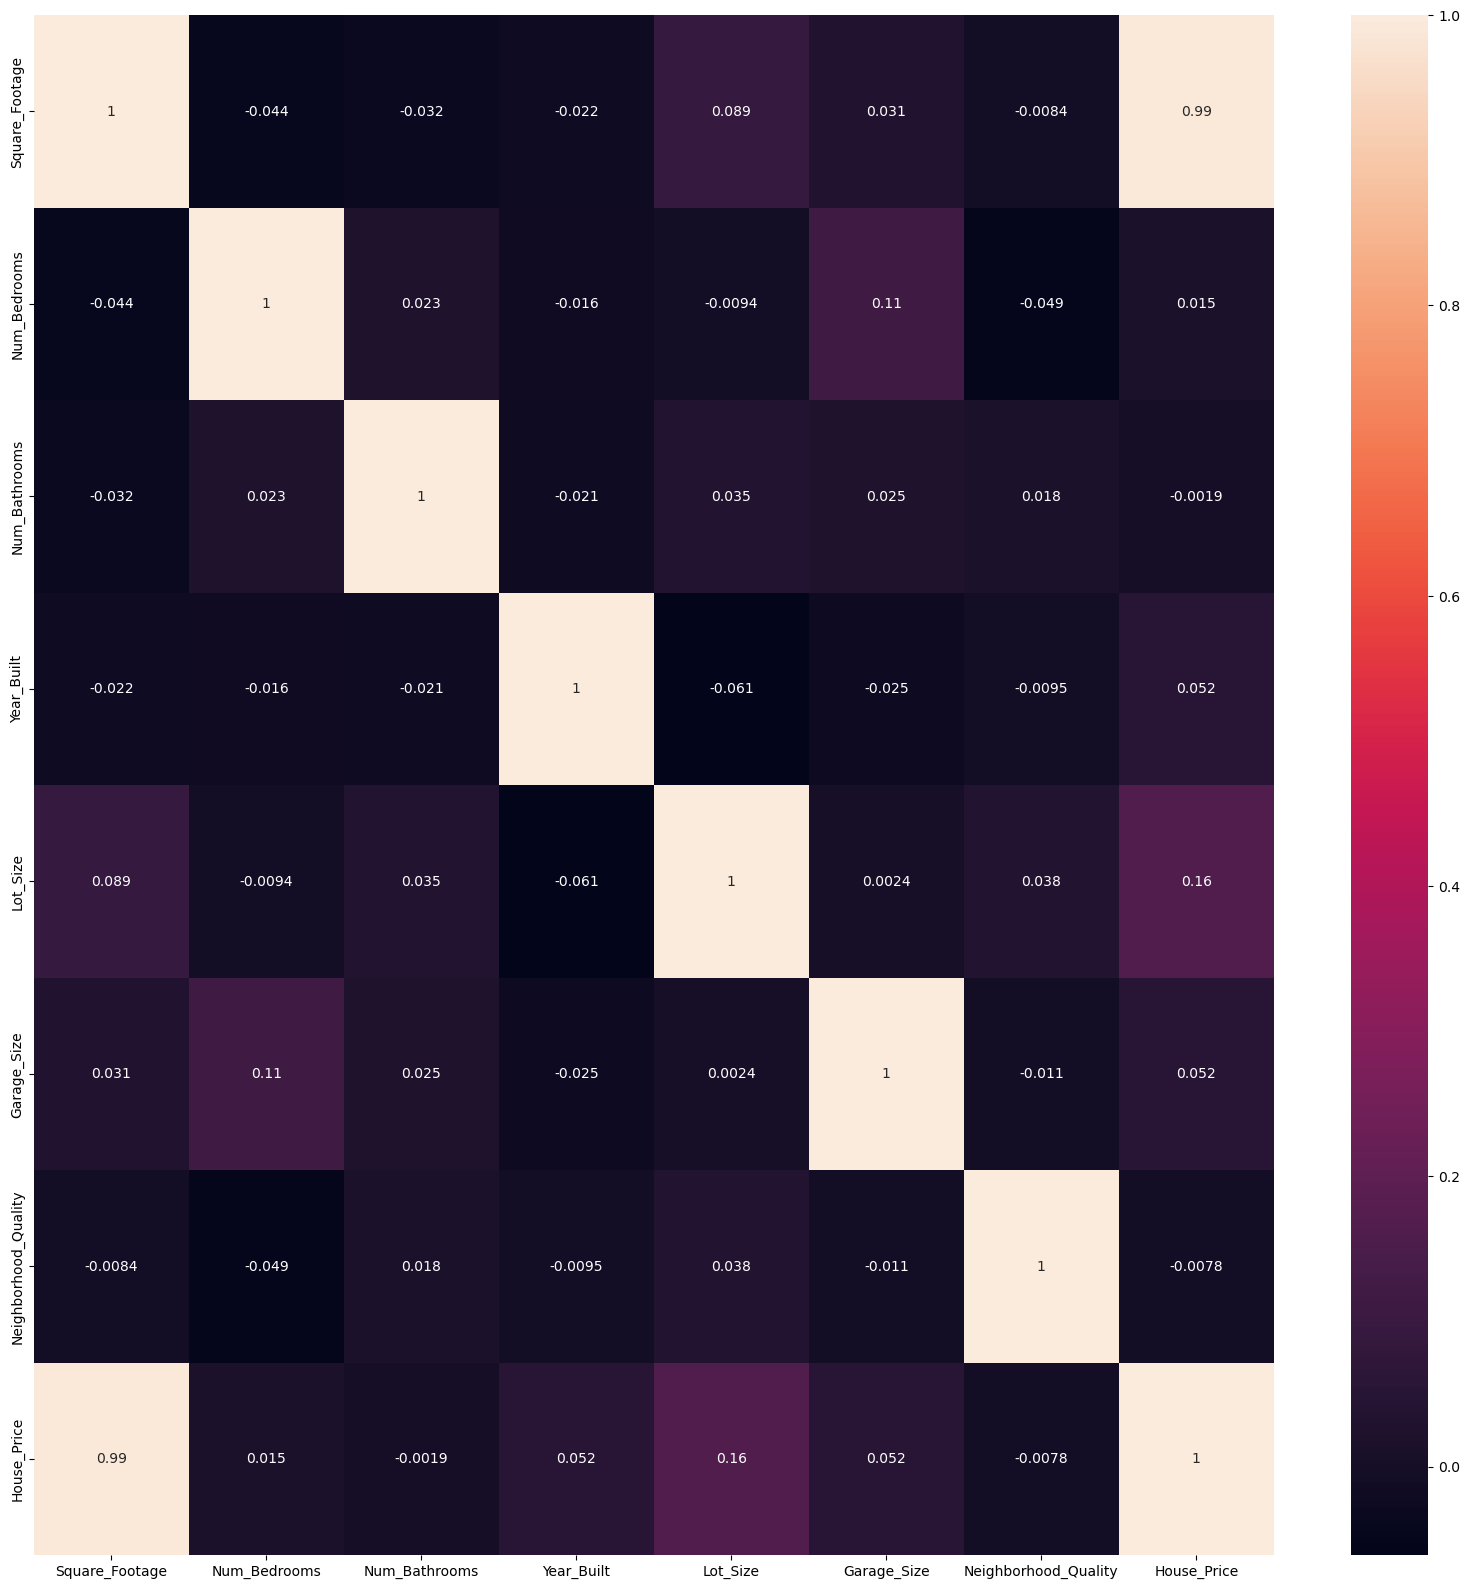

In [40]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True)

## Creating model

### Test Train split

In [46]:
Y = df["House_Price"]
X = df.drop(columns=["House_Price"], axis = 1)

In [48]:
X 

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
0,1360,2,1,1981,0.599637,0,5
1,4272,3,3,2016,4.753014,1,6
2,3592,1,2,2016,3.634823,0,9
3,966,1,2,1977,2.730667,1,8
4,4926,2,1,1993,4.699073,0,8
...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10
996,3179,1,2,1999,2.977123,1,10
997,2606,4,2,1962,4.055067,0,2
998,4723,5,2,1950,1.930921,0,7


In [49]:
Y

0      2.623829e+05
1      9.852609e+05
2      7.779774e+05
3      2.296989e+05
4      1.041741e+06
           ...     
995    7.014940e+05
996    6.837232e+05
997    5.720240e+05
998    9.648653e+05
999    7.425993e+05
Name: House_Price, Length: 1000, dtype: float64

In [50]:
# train test split method to partition the X and Y into test and train data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)


In [51]:
x_train

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
29,2028,2,3,1967,1.784790,2,2
535,3519,5,3,1966,4.009947,0,10
695,4507,2,3,2014,4.122337,0,7
557,3371,4,2,2000,1.580318,0,1
836,2871,5,1,1974,3.426914,2,6
...,...,...,...,...,...,...,...
106,2257,5,1,1968,3.131006,0,2
270,3894,3,2,1975,1.256532,0,5
860,1484,5,1,2010,1.246555,1,6
435,1865,4,2,1994,4.354220,0,7


In [52]:
x_test

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
521,4012,3,1,2016,2.098092,1,5
737,2310,3,1,1988,1.369622,1,4
740,4708,1,3,1962,1.792970,1,8
660,4932,2,1,1972,4.479598,1,2
411,3646,1,1,1994,3.980987,0,9
...,...,...,...,...,...,...,...
408,3767,5,3,1981,1.520335,2,4
332,616,2,3,1965,3.461372,1,7
208,4491,4,2,1994,3.399155,0,4
613,1858,1,1,1996,4.546672,2,8


In [55]:
y_train

29     434165.896634
535    788284.690202
695    985499.196316
557    736289.124555
836    636552.752485
           ...      
106    501305.548994
270    797034.425504
860    360372.978039
435    478566.065591
102    340069.229776
Name: House_Price, Length: 800, dtype: float64

In [54]:
y_test

521    9.010005e+05
737    4.945375e+05
740    9.494042e+05
660    1.040389e+06
411    7.940100e+05
           ...     
408    8.245296e+05
332    1.803936e+05
208    9.658167e+05
613    4.336642e+05
78     6.639050e+05
Name: House_Price, Length: 200, dtype: float64

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
linear_Model = LinearRegression()

In [59]:
# Train linear regression model
linear_Model.fit(x_train,y_train)

LinearRegression()

In [60]:
#  Score in train
linear_Model.score(x_train, y_train)

0.9985375946918145

In [61]:
# Score in test
linear_Model.score(x_test, y_test)

0.9984263636823408

In [62]:
pd.DataFrame(data = [linear_Model.coef_], columns = [X.columns])

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
0,199.513245,10225.204424,8208.434778,993.537171,14885.384415,5146.148383,115.068595


In [64]:
y_test_predictedd = linear_Model.predict(x_test)

In [66]:
# Evaluation : MAE, MSE, R^2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_test_predictedd)}")
print(f"MAE: {mean_absolute_error(y_test, y_test_predictedd)}")
print(f"R^2 Score: {r2_score(y_test, y_test_predictedd)}")

MSE: 101434798.50566666
MAE: 8174.583600008635
R^2 Score: 0.9984263636823408


In [92]:
# R^2 Score
sum_residual = 0
sum_total = 0
for i in range(y_test.shape[0]):
    sum_residual += pow((list(y_test)[i] - y_test_predictedd[i]), 2)

for i in range(y_test.shape[0]):
    sum_total += pow((list(y_test)[i] - y_test.mean()), 2)

In [93]:
1 - (sum_residual / sum)

0.998431300806386

In [96]:
new_instance = np.array([[3693,2,2,2017,3.63,1,9]])

In [97]:
linear_Model.predict(new_instance)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([827282.45748846])